In [1]:
import nest
import numpy as np
import yaml
import matplotlib.pyplot as plt
import evaluate_input as ev

nest.ResetKernel()


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:33:52

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
# Load the YAML configuration once
with open('config.yaml', 'r') as f:
    config = yaml.safe_load(f)

In [3]:

num_inputs = config['structure']['N_clusters']
duration = config['simulate']['duration']

i_rate= [1000, 1000, 1000, 1000]
i_amplitude= [1500, 1500, 1500, 1500]
i_freq =[  5,13.33333333, 21.66666667,30 ]

input = nest.Create('sinusoidal_poisson_generator', n = num_inputs, params={"rate": i_rate, "amplitude": i_amplitude, "frequency": i_freq})

# Create corresponding parrot neurons, one per input
parrot_neurons = nest.Create("parrot_neuron", num_inputs)

# Connect each sinus input to the corresponding parrot neuron
nest.Connect(input, parrot_neurons, "one_to_one")

# Create ONE spike recorder
single_spike_recorder = nest.Create("spike_recorder")

nest.Connect(parrot_neurons, single_spike_recorder, "all_to_all")

# Run the simulation
nest.Simulate(duration)


Jan 07 20:25:23 NodeManager::prepare_nodes [Info]: 
    Preparing 9 nodes for simulation.

Jan 07 20:25:23 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 9
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Jan 07 20:25:23 SimulationManager::run [Info]: 
    Simulation finished.


## Visualise

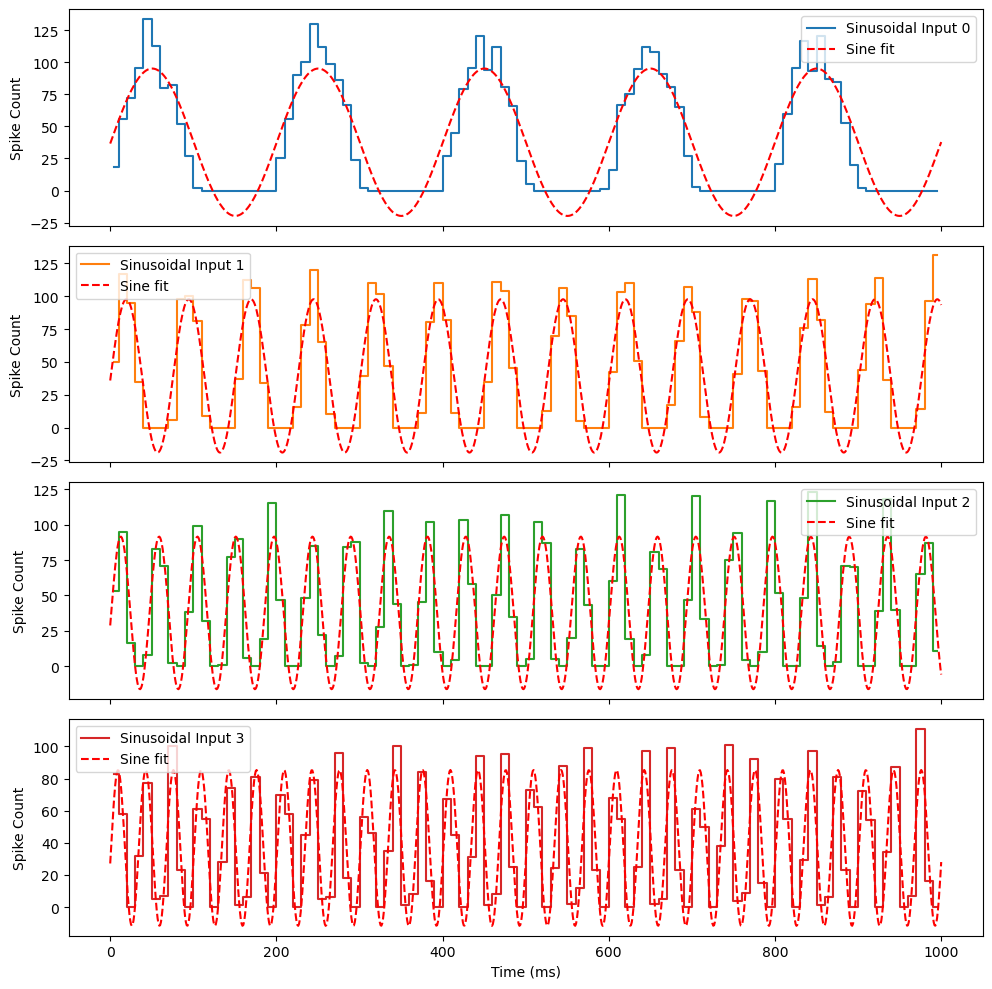

In [4]:
info_input = ev.plot_histograms_of_inputs(
    num_inputs=num_inputs,
    parrot_ids=parrot_neurons,          # the list of parrot neuron IDs
    parrot_spikes=single_spike_recorder,  # single spike_recorder
    duration=duration,                    # match your simulate time
    bin_size=10.0,
    title_prefix="Sinusoidal Input"
)

### reconstruct sine curves

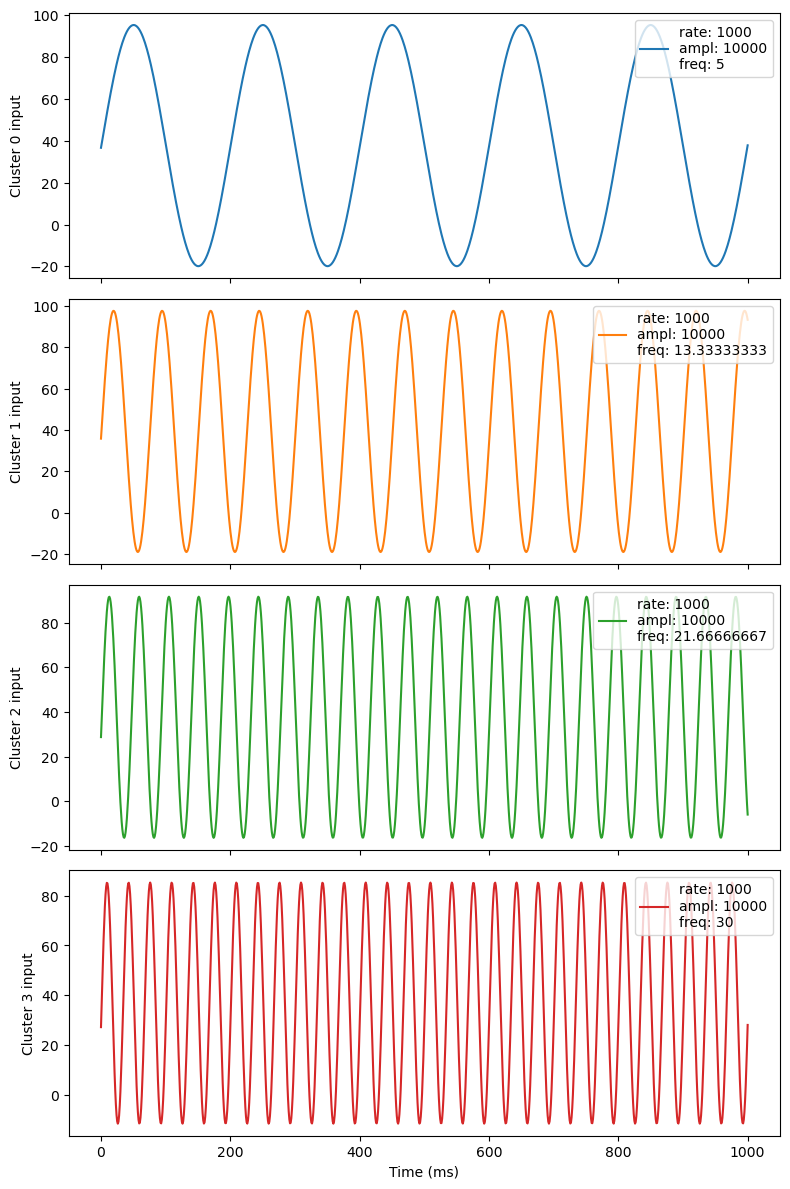

In [5]:
ev.plot_fitted_sine_curves(
    fit_info=info_input,
    rates=i_rate,
    amplitudes=i_amplitude,
    frequencies=i_freq,
)